In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
#Retrieveing the Data
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv"
df = pd.read_csv(URL)
df.set_index("Country", inplace = True)
df.head()


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


<h2> Lineplot

In [12]:
years = list(map(str, range(1980, 2014)))
df_line=df[years]

#Applying sum to get total immigrants year-wise
total_immigrants=df_line.sum()
total_immigrants[:5]

1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
dtype: int64

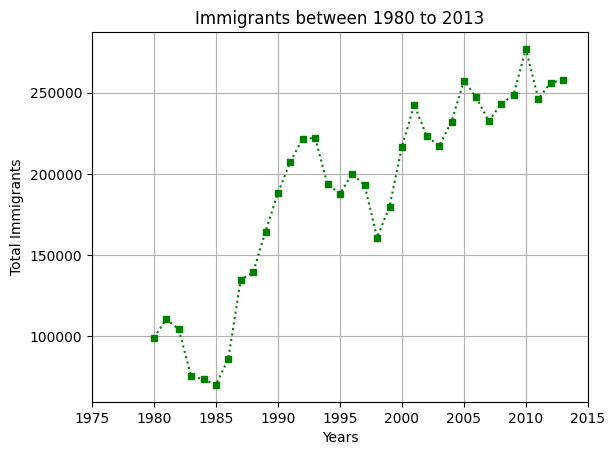

In [18]:
#Create figure and axes
fig, ax = plt.subplots()

# Plot the line
total_immigrants.index = total_immigrants.index.map(int)
ax.plot(total_immigrants, 
        marker='s', #Including markers in squares shapes
        markersize=5, #Setting the size of the marker
        color='green', #Changing the color of the line
        linestyle="dotted")

#Setting up the Title
ax.set_title('Immigrants between 1980 to 2013') 
#Setting up the Labels
ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')

#limits on x-axis
plt.xlim(1975, 2015)  #or ax.set_xlim()

#Enabling Grid
plt.grid(True)  #or ax.grid()

#Display the plot
plt.show()

<h2> Scatter Plot

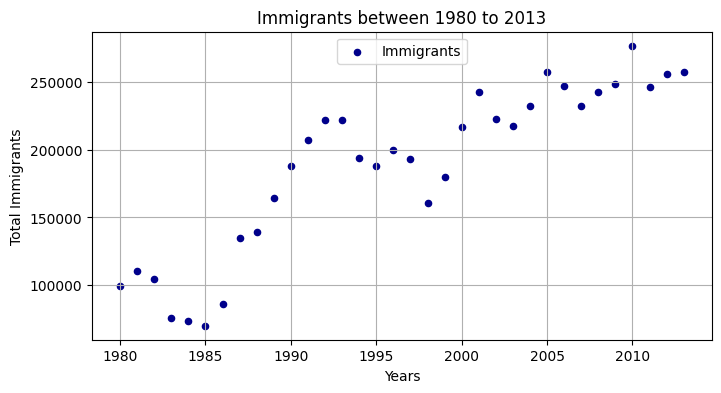

In [19]:
#Create figure and axes
fig, ax = plt.subplots(figsize=(8, 4))

total_immigrants.index = total_immigrants.index.map(int)

# Customizing Scatter Plot 
ax.scatter(total_immigrants.index, total_immigrants, 
           marker='o', #setting up the markers
           s = 20, #setting up the size of the markers
           color='darkblue')#the color for the marker

#add title 
plt.title('Immigrants between 1980 to 2013') 
#add labels 
plt.xlabel('Years')
plt.ylabel('Total Immigrants') 
#including grid
plt.grid(True)

#Legend at upper center of the figure
ax.legend(["Immigrants"], loc='upper center')

#Display the plot
plt.show()

<h2> Bar Plot

In [22]:
df.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries with head function
df_top5 = df.head()

#resetting the index back to original way
df_bar_5=df_top5.reset_index()

#Creating alist of names of the top 5 countries
label=list(df_bar_5.Country)
label[2] = 'UK'
label



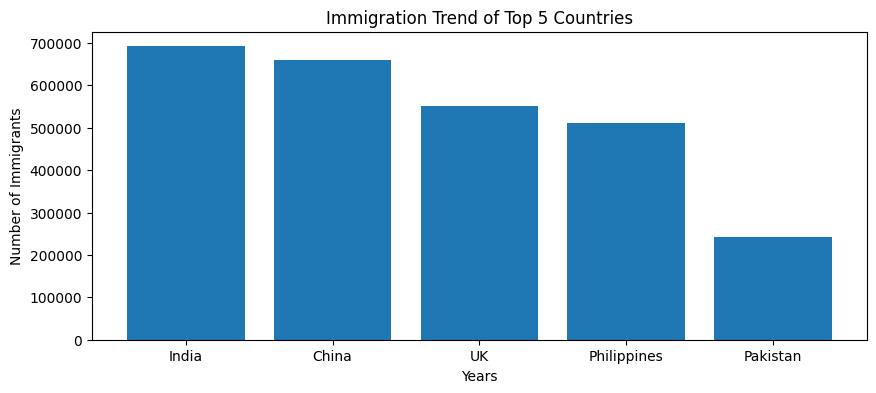

In [24]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(label,df_bar_5['Total'], label=label)
ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

plt.show()

<h2> Histogram

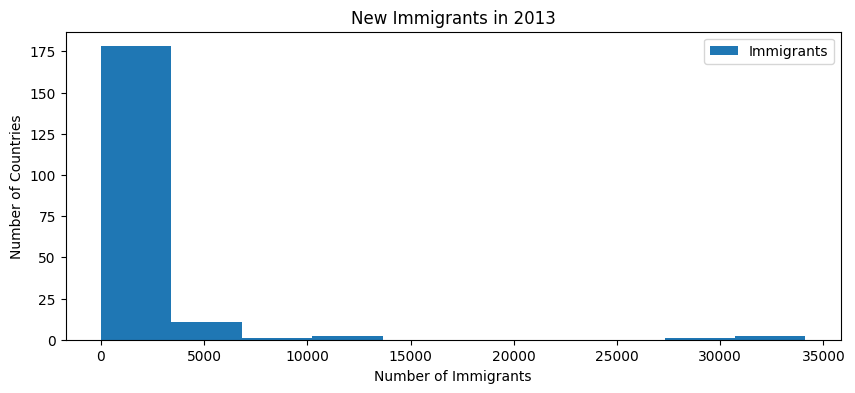

In [25]:
df_country = df.groupby(['Country'])['2013'].sum().reset_index()

#Create figure and axes
fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(df_country['2013'])
ax.set_title('New Immigrants in 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Countries')
ax.legend(['Immigrants'])

#Display the plot
plt.show()

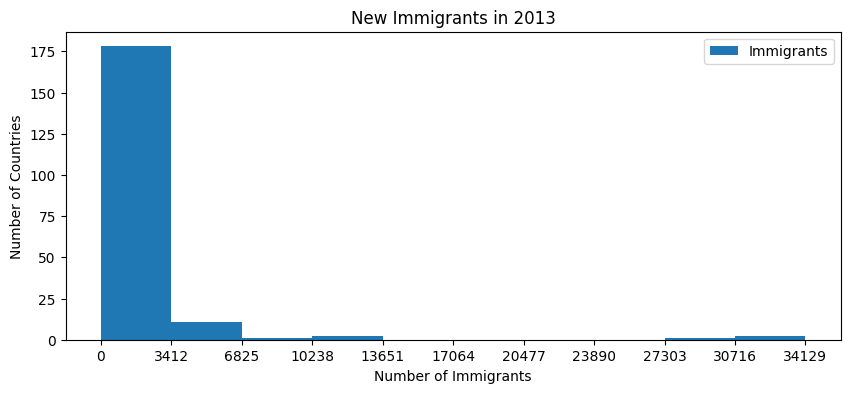

In [26]:
# Plot the bar
fig, ax = plt.subplots(figsize=(10, 4))
count = ax.hist(df_country['2013'])

#you can check the arrays in count with indexing count[0] for count, count[1] for bins

ax.set_title('New Immigrants in 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Countries')
ax.set_xticks(list(map(int,count[1])))
ax.legend(['Immigrants'])

#Display the plot
plt.show()

In [28]:
# let's quickly view the dataset 
df1=df.groupby(['Country'])[years].sum()
df_dns=df1.loc[['Denmark', 'Norway', 'Sweden'], years]
df_dns=df_dns.T
df_dns[:10]

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128
1985,73,54,158
1986,93,56,187
1987,109,80,198
1988,129,73,171
1989,129,76,182


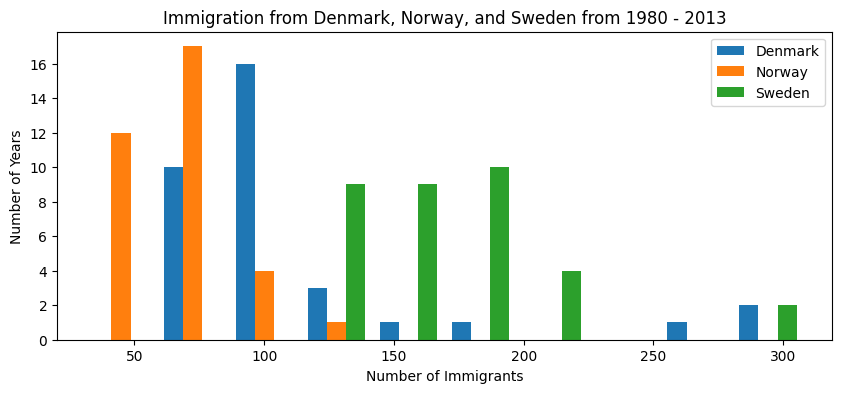

In [29]:
#Create figure and axes
fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(df_dns)
ax.set_title('Immigration from Denmark, Norway, and Sweden from 1980 - 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Years')
ax.legend(['Denmark', 'Norway', 'Sweden'])
#Display the plot
plt.show()

<h2>Piechart

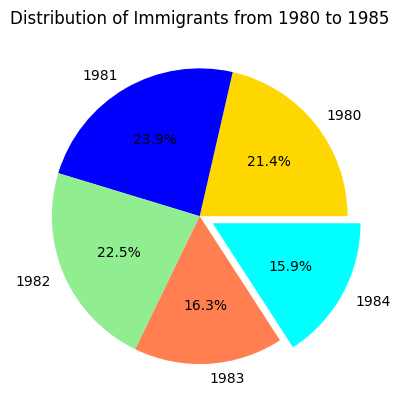

In [30]:
fig,ax=plt.subplots()

#Pie on immigrants
ax.pie(total_immigrants[0:5], labels=years[0:5], 
       colors = ['gold','blue','lightgreen','coral','cyan'],
       autopct='%1.1f%%',explode = [0,0,0,0,0.1]) #using explode to highlight the lowest 

ax.set_aspect('equal')  # Ensure pie is drawn as a circle

plt.title('Distribution of Immigrants from 1980 to 1985')
#plt.legend(years[0:5]), include legend, if you donot want to pass the labels
plt.show()

<h2> Subplotting

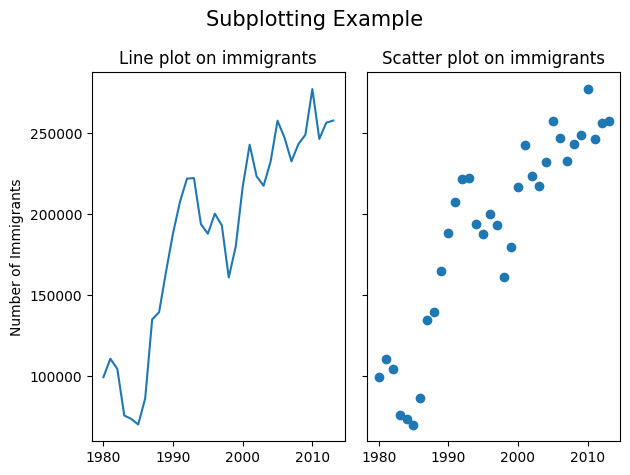

In [31]:
# Create a figure with two axes in a row

fig, axs = plt.subplots(1, 2, sharey=True)

#Plotting in first axes - the left one
axs[0].plot(total_immigrants)
axs[0].set_title("Line plot on immigrants")

#Plotting in second axes - the right one
axs[1].scatter(total_immigrants.index, total_immigrants)
axs[1].set_title("Scatter plot on immigrants")

axs[0].set_ylabel("Number of Immigrants")
            
#Adding a Title for the Overall Figure
fig.suptitle('Subplotting Example', fontsize=15)

# Adjust spacing between subplots
fig.tight_layout()


# Show the figure
plt.show()

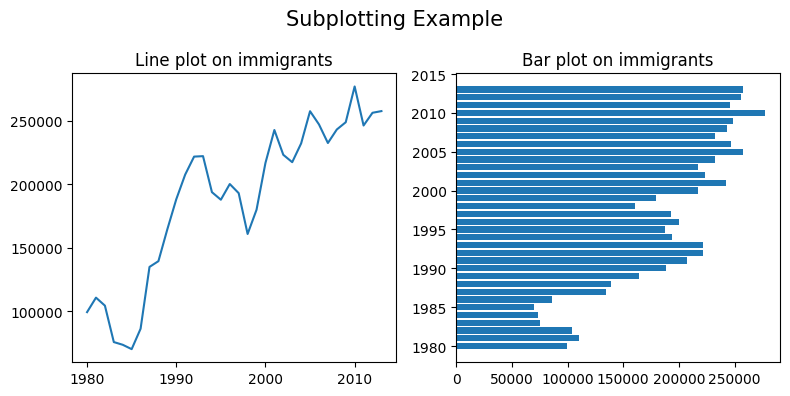

In [32]:
# Create a figure with Four axes - two rows, two columns
fig = plt.figure(figsize=(8,4))

# Add the first subplot (top-left)
axs1 = fig.add_subplot(1, 2, 1)
#Plotting in first axes - the left one
axs1.plot(total_immigrants)
axs1.set_title("Line plot on immigrants")

# Add the second subplot (top-right)
axs2 = fig.add_subplot(1, 2, 2)
#Plotting in second axes - the right one
axs2.barh(total_immigrants.index, total_immigrants) #Notice the use of 'barh' for creating horizontal bar plot
axs2.set_title("Bar plot on immigrants")
            
#Adding a Title for the Overall Figure
fig.suptitle('Subplotting Example', fontsize=15)

# Adjust spacing between subplots
fig.tight_layout()


# Show the figure
plt.show()